# COVID-19 Vaccination Statistics in England

I-Hsuan Lin

University of Manchester

June 20, 2021

## 1. Introduction

This notebook shows how to use `readxl` package to retreive the *Monthly COVID-19 Vaccinations* Dataset from
[NHS England](https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-vaccinations/) and create various plots to show key statistics with `ggplot2`.

### About this dataset

This publication shows the number of vaccinations given to people in England who are eligible for vaccination (individuals who have an NHS number and are currently alive in the resident population). This data covers vaccinations administered up to midnight of the last day of each month.

- **Period**: 8th December 2020 to 31st May 2021
- **Source**: National Immunisation Management Service (NIMS)
- **Published**: 10th June 2021

## 2. Loading required libraries

In [1]:
library(readxl)
library(ggplot2)
library(scales)
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



## 3. Set output parameters

In [2]:
# Set width
options(width = 110)

# Set output image size
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)

## 4. Retrieve datasets

- `n1` - Population Estimates (ONS)
- `n2` - Vaccinations by Region and Age
- `n3` - Vaccinations by NHS Region and Vaccination Date

In [3]:
domain <- "https://www.england.nhs.uk"
path <- "statistics/wp-content/uploads/sites/2/2021/06"
filename <- "COVID-19-monthly-announced-vaccinations-10-June-2021.xlsx"

# Download file
download.file(url = paste0(domain, "/", path, "/", filename), destfile = filename, method = "curl")

In [4]:
# Use read_excel to import from Excel file
n1 <- read_excel(filename, sheet = "Population estimates (ONS)", range = cell_rows(c(12:22)), 
                 .name_repair = "minimal")
n2 <- read_excel(filename, sheet = "Region & Age", range = cell_rows(c(11:21)), .name_repair = "minimal")
n3 <- read_excel(filename, sheet = "Vaccination Date", range = cell_rows(c(11:1000)), .name_repair = "minimal")

In [5]:
n1 # Population estimates (ONS)

NHS Region of Residence,,Population estimates,,,,,,,,,,,,,
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,Under 16,16-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,16+
Total,NA,10816679,9754914,3807954,3733642,3414297,3715812,3907461,3670651,3111835,2796740,2779326,1940686,2836964,45470282
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
East Of England,NA,1278891,1012817,416479,426849,405603,439850,464135,433005,369061,337934,347827,238510,358052,5250122
London,NA,1843581,1706059,838109,781520,661032,596614,567017,495468,391074,312926,273546,193310,301733,7118408
Midlands,NA,2038010,1896036,676555,657817,603841,693094,739888,694394,589600,545416,540061,386766,540399,8563867
North East And Yorkshire,NA,1601658,1534282,546140,526333,476674,554632,600997,585379,512836,460263,451899,308213,444415,7002063
North West,NA,1359003,1252395,469239,447740,402041,458537,492694,472097,399933,359385,354577,247695,346076,5702409
South East,NA,1702300,1442856,530286,563599,553756,608907,642189,599419,503991,451427,471223,328627,499255,7195535


In [6]:
n2 # Region & Age

NHS Region of Residence,,1st dose5,,,,,,,,⋯,,,,% who have had both doses (using ONS denominators)7,,,,,,
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,Under 30,30-34,35-39,40-44,45-49,50-54,55-59,60-64,⋯,75-79,80+,NA,50-54,55-59,60-64,65-69,70-74,75-79,80+
Total4,NA,2174361,1842530,2567441,2903284,3116141,3564323,3558216,3090916,⋯,100%*,0.94457490472209027,NA,0.55988786580339511,0.63617979481023934,0.84159410765673626,0.90142809127770185,0.95131805336977382,100%*,0.91571482754099098
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
East of England,NA,236239,200931,299705,352039,378960,428843,425864,368314,⋯,100%*,0.94744059522080593,NA,0.57253169875144083,0.62053094075126158,0.84245964759213243,0.90478318251492895,0.95498624316111169,100%*,0.92576497268553171
London,NA,334604,335714,466950,506452,480089,486570,449090,364617,⋯,0.91840049661166001,0.8462846291257502,NA,0.52403367094813735,0.62558227776566799,0.78280069756618953,0.82841949853959085,0.87460609915699739,0.87711447933371267,0.8015927989315057
Midlands,NA,413181,344717,454256,515553,575408,679670,673981,588591,⋯,100%*,0.95766646496385077,NA,0.55208491014856298,0.65221905719231443,0.87687415196743557,0.90503212226997376,0.95547910328648056,100%*,0.92962607258710694
North East and Yorkshire,NA,344390,285614,379761,413641,460678,552614,568128,511088,⋯,100%*,0.95080049053249782,NA,0.55257513764627775,0.63043600812465084,0.800540523676185,0.91202203957302674,0.97208447020241251,100%*,0.92425773207474993
North West,NA,331642,242884,317481,342136,376872,448284,457835,400796,⋯,100%*,0.94685560397138202,NA,0.57829606205880324,0.63807226057356858,0.84682184265864535,0.90196307581006441,0.95818115670221138,0.9828095036234078,0.91235162218703403
South East,NA,306462,274473,408748,487825,526158,590930,589760,504838,⋯,100%*,0.95131546003545286,NA,0.55370926627519312,0.6204024230129509,0.86055703375655512,0.91729781337846428,0.94770416554370229,100%*,0.92381448358053497


In [7]:
head(n3) # Vaccination Date

Date of Vaccination,,1st dose,,,,,,,,⋯,2nd dose,,,,,,,,,Cumulative total doses to date4
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
NA,NA,East Of England,London,Midlands,North East And Yorkshire,North West,South East,South West,England4,⋯,East Of England,London,Midlands,North East And Yorkshire,North West,South East,South West,England4,NA,NA
44207,Monday,207043,251755,429404,401831,300150,382495,252642,2230117,⋯,53422,49597,65940,69238,59691,70379,53200,422319,NA,2652436
44208,Tuesday,223095,270268,462074,436690,326573,408953,272992,2405818,⋯,53875,52178,66944,71213,61630,72700,53409,432843,NA,2838661
44209,Wednesday,244792,301514,510489,486127,362052,447509,300929,2659043,⋯,54236,54157,67183,71482,62390,75355,53504,439223,NA,3098266
44210,Thursday,274254,341512,567812,526661,409471,490504,330860,2947373,⋯,54388,55494,67329,71720,63004,76430,53654,442948,NA,3390321
44211,Friday,314987,382649,631793,573547,460139,543309,368482,3281882,⋯,54480,56238,67620,71814,63566,76803,53730,445191,NA,3727073


## 5. Set descriptions

In [8]:
# 'Under 16','16-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'
agegroups1 <- n1[1, 3:15] %>% as.character()
names(agegroups1) <- paste0("G", 1:length(agegroups1))
agegroups1 <- factor(agegroups1, levels = agegroups1)
agegroups1

# '16-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'
agegroups2 <- agegroups1[-1]
names(agegroups2) <- paste0("G", 1:length(agegroups2))
agegroups2 <- factor(agegroups2, levels = agegroups2)
agegroups2

regions <- n1[4:10,1] %>% pull()
names(regions) <- paste0("R", 1:length(regions))
regions <- as.factor(regions)
regions

G1       G2       G3       G4       G5       G6       G7       G8       G9      G10      G11      G12 
Under 16    16-29    30-34    35-39    40-44    45-49    50-54    55-59    60-64    65-69    70-74    75-79 
     G13 
     80+ 
Levels: Under 16 16-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79 80+

G1    G2    G3    G4    G5    G6    G7    G8    G9   G10   G11   G12 
16-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79   80+ 
Levels: 16-29 30-34 35-39 40-44 45-49 50-54 55-59 60-64 65-69 70-74 75-79 80+

R1                       R2                       R3                       R4 
         East Of England                   London                 Midlands North East And Yorkshire 
                      R5                       R6                       R7 
              North West               South East               South West 
Levels: East Of England London Midlands North East And Yorkshire North West South East South West

## 6. Manipulate `data.frame`

### ONS population mapped to NHS Region (tibble `n1`)

In [9]:
population <- as.data.frame(n1)
# Remove columns and rows with all NAs
population <- population[rowSums(is.na(population)) != ncol(population), 
                         colSums(is.na(population)) != nrow(population)]

# Drop last column with 16+ statistics
population <- population[-(1:2), -ncol(population)]
colnames(population) <- c("Region", names(agegroups1))
population <- mutate_at(population, vars(2:ncol(population)), "as.integer")
rownames(population) <- population$Region
population <- population[regions,]
population

# Drop first column with Under 16 statistics
population2 <- data.frame(Region = population$Region, population[,3:ncol(population)])
colnames(population2) <- c("Region", names(agegroups2))
population2

,Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East Of England,East Of England,1278891,1012817,416479,426849,405603,439850,464135,433005,369061,337934,347827,238510,358052
London,London,1843581,1706059,838109,781520,661032,596614,567017,495468,391074,312926,273546,193310,301733
Midlands,Midlands,2038010,1896036,676555,657817,603841,693094,739888,694394,589600,545416,540061,386766,540399
North East And Yorkshire,North East And Yorkshire,1601658,1534282,546140,526333,476674,554632,600997,585379,512836,460263,451899,308213,444415
North West,North West,1359003,1252395,469239,447740,402041,458537,492694,472097,399933,359385,354577,247695,346076
South East,South East,1702300,1442856,530286,563599,553756,608907,642189,599419,503991,451427,471223,328627,499255
South West,South West,993236,910469,331146,329784,311350,364178,400541,390889,345340,329389,340193,237565,347034


,Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
East Of England,East Of England,1012817,416479,426849,405603,439850,464135,433005,369061,337934,347827,238510,358052
London,London,1706059,838109,781520,661032,596614,567017,495468,391074,312926,273546,193310,301733
Midlands,Midlands,1896036,676555,657817,603841,693094,739888,694394,589600,545416,540061,386766,540399
North East And Yorkshire,North East And Yorkshire,1534282,546140,526333,476674,554632,600997,585379,512836,460263,451899,308213,444415
North West,North West,1252395,469239,447740,402041,458537,492694,472097,399933,359385,354577,247695,346076
South East,South East,1442856,530286,563599,553756,608907,642189,599419,503991,451427,471223,328627,499255
South West,South West,910469,331146,329784,311350,364178,400541,390889,345340,329389,340193,237565,347034


### COVID-19 vaccinations by NHS region of residence and age group (tibble `n2`)

In [10]:
d <- as.data.frame(n2)
# Remove columns and rows with all NAs
d <- d[rowSums(is.na(d)) != ncol(d), colSums(is.na(d)) != nrow(d)]
d

,NHS Region of Residence,1st dose5,,.1,.2,.3,.4,.5,.6,.7,⋯,.30,.31,.32,% who have had both doses (using ONS denominators)7,.33,.34,.35,.36,.37,.38
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,Under 30,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,⋯,70-74,75-79,80+,50-54,55-59,60-64,65-69,70-74,75-79,80+
2,Total4,2174361,1842530,2567441,2903284,3116141,3564323,3558216,3090916,2655728,⋯,0.97495831723230741,100%*,0.94457490472209027,0.55988786580339511,0.63617979481023934,0.84159410765673626,0.90142809127770185,0.95131805336977382,100%*,0.91571482754099098
4,East of England,236239,200931,299705,352039,378960,428843,425864,368314,320836,⋯,0.97574368867281724,100%*,0.94744059522080593,0.57253169875144083,0.62053094075126158,0.84245964759213243,0.90478318251492895,0.95498624316111169,100%*,0.92576497268553171
5,London,334604,335714,466950,506452,480089,486570,449090,364617,281862,⋯,0.91819291819291815,0.91840049661166001,0.8462846291257502,0.52403367094813735,0.62558227776566799,0.78280069756618953,0.82841949853959085,0.87460609915699739,0.87711447933371267,0.8015927989315057
6,Midlands,413181,344717,454256,515553,575408,679670,673981,588591,516742,⋯,0.977626601439467,100%*,0.95766646496385077,0.55208491014856298,0.65221905719231443,0.87687415196743557,0.90503212226997376,0.95547910328648056,100%*,0.92962607258710694
7,North East and Yorkshire,344390,285614,379761,413641,460678,552614,568128,511088,443137,⋯,0.99191633528730982,100%*,0.95080049053249782,0.55257513764627775,0.63043600812465084,0.800540523676185,0.91202203957302674,0.97208447020241251,100%*,0.92425773207474993
8,North West,331642,242884,317481,342136,376872,448284,457835,400796,342754,⋯,0.98450266091709271,100%*,0.94685560397138202,0.57829606205880324,0.63807226057356858,0.84682184265864535,0.90196307581006441,0.95818115670221138,0.9828095036234078,0.91235162218703403
9,South East,306462,274473,408748,487825,526158,590930,589760,504838,433492,⋯,0.96857114359867835,100%*,0.95131546003545286,0.55370926627519312,0.6204024230129509,0.86055703375655512,0.91729781337846428,0.94770416554370229,100%*,0.92381448358053497
10,South West,196653,149807,231875,278255,311471,370586,386574,346862,312712,⋯,0.98058455053454951,100%*,0.97688410933798997,0.60015329267166162,0.65922806730299399,0.86231539931661549,0.91378886362325396,0.96293574529752224,100%*,0.95523205219085161


#### First dose (region & age group)

In [11]:
# Wide format
d1 <- d[-(1:2), 1:(length(agegroups2)+1)]
colnames(d1) <- c("Region", names(agegroups2))
d1$Region <- stringr::str_to_title(d1$Region)
d1$Region <- factor(d1$Region, levels = levels(regions))
d1

# Convert to long format
d1 <- pivot_longer(d1, !Region, names_to = "AgeGroup", values_to = "Count")
d1$Dose <- "First Dose"
head(d1)

,Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,East Of England,236239,200931,299705,352039,378960,428843,425864,368314,320836,339390,249457,339233
5,London,334604,335714,466950,506452,480089,486570,449090,364617,281862,251168,177536,255352
6,Midlands,413181,344717,454256,515553,575408,679670,673981,588591,516742,527978,398259,517522
7,North East And Yorkshire,344390,285614,379761,413641,460678,552614,568128,511088,443137,448246,314489,422550
8,North West,331642,242884,317481,342136,376872,448284,457835,400796,342754,349082,249454,327684
9,South East,306462,274473,408748,487825,526158,590930,589760,504838,433492,456413,341916,474949
10,South West,196653,149807,231875,278255,311471,370586,386574,346862,312712,333588,251159,339012


Region,AgeGroup,Count,Dose
<fct>,<chr>,<chr>,<chr>
East Of England,G1,236239,First Dose
East Of England,G2,200931,First Dose
East Of England,G3,299705,First Dose
East Of England,G4,352039,First Dose
East Of England,G5,378960,First Dose
East Of England,G6,428843,First Dose


#### Second dose (region & age group)

In [12]:
# Wide format
d2 <- d[-(1:2), 14:(length(agegroups2)+13)]
colnames(d2) <- names(agegroups2)
d2 <- cbind(data.frame(Region = factor(levels(d1$Region))), d2)
d2

# Convert to long format
d2 <- pivot_longer(d2, !Region, names_to = "AgeGroup", values_to = "Count")
d2$Dose <- "Second Dose"
head(d2)

,Region,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,East Of England,133627,80938,93218,111092,141877,265732,268693,310919,305757,332170,244924,331472
5,London,169974,116576,132746,158623,193127,297136,309956,306133,259234,239245,169555,241867
6,Midlands,227261,134753,154977,183653,245938,408481,452897,517005,493619,516017,389987,502369
7,North East And Yorkshire,189345,111462,124953,140401,182006,332096,369044,410546,419770,439284,309042,410754
8,North West,163270,99816,115165,128425,161007,284923,301232,338672,324152,339749,243437,315743
9,South East,177813,108188,122851,149575,191129,355586,371881,433713,414093,446580,335415,461219
10,South West,125487,72915,80100,94715,122578,240386,257685,297792,300992,327584,247372,331498


Region,AgeGroup,Count,Dose
<fct>,<chr>,<chr>,<chr>
East Of England,G1,133627,Second Dose
East Of England,G2,80938,Second Dose
East Of England,G3,93218,Second Dose
East Of England,G4,111092,Second Dose
East Of England,G5,141877,Second Dose
East Of England,G6,265732,Second Dose


#### Combine 1st and 2nd doses (region & age group)

In [13]:
data <- rbind(d1, d2)
data <- merge(pivot_longer(population2, !Region, names_to = "AgeGroup", values_to = "Total"), data)
data$Count <- as.integer(data$Count)
data$Fraction <- data$Count / data$Total
data$Region <- factor(data$Region, levels = levels(regions))
data$AgeGroup <- as.factor(data$AgeGroup)
data$AgeGroup <- factor(data$AgeGroup, levels = gtools::mixedsort(levels(data$AgeGroup)))
levels(data$AgeGroup) <- agegroups2
head(data)

,Region,AgeGroup,Total,Count,Dose,Fraction
,<fct>,<fct>,<int>,<int>,<chr>,<dbl>
1,East Of England,16-29,1012817,236239,First Dose,0.2332494
2,East Of England,16-29,1012817,133627,Second Dose,0.1319360
3,East Of England,70-74,347827,332170,Second Dose,0.9549862
4,East Of England,70-74,347827,339390,First Dose,0.9757437
5,East Of England,75-79,238510,249457,First Dose,1.0458974
6,East Of England,75-79,238510,244924,Second Dose,1.0268920


### COVID-19 cumulative vaccinations by date of vaccination and NHS region of residence (tibble `n3`)

In [14]:
d <- as.data.frame(n3)
# Remove columns and rows with all NAs
d <- d[rowSums(is.na(d)) != ncol(d), colSums(is.na(d)) != nrow(d)]
d <- d[grep("^44", d$"Date of Vaccination", invert = FALSE), ]
head(d)

,Date of Vaccination,,1st dose,.1,.2,.3,.4,.5,.6,.7,2nd dose,.8,.9,.10,.11,.12,.13,.14,Cumulative total doses to date4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,44207,Monday,207043,251755,429404,401831,300150,382495,252642,2230117,53422,49597,65940,69238,59691,70379,53200,422319,2652436
3,44208,Tuesday,223095,270268,462074,436690,326573,408953,272992,2405818,53875,52178,66944,71213,61630,72700,53409,432843,2838661
4,44209,Wednesday,244792,301514,510489,486127,362052,447509,300929,2659043,54236,54157,67183,71482,62390,75355,53504,439223,3098266
5,44210,Thursday,274254,341512,567812,526661,409471,490504,330860,2947373,54388,55494,67329,71720,63004,76430,53654,442948,3390321
6,44211,Friday,314987,382649,631793,573547,460139,543309,368482,3281882,54480,56238,67620,71814,63566,76803,53730,445191,3727073
7,44212,Saturday,363813,413049,681571,620837,496747,586345,402764,3572608,54593,56510,67724,72017,63896,76890,53850,446426,4019034


#### First dose (date & region)

In [15]:
# Wide format
d3 <- d[, c(1, 3:(length(regions)+2))]
colnames(d3) <- c("Date", names(regions))
d3$Date <- as.Date(as.integer(d3$Date), origin = "1899-12-30") # Change data format
head(d3)

# Convert to long format
d3 <- pivot_longer(d3, !Date, names_to = "Region", values_to = "Count")
d3$Dose <- "First Dose"
head(d3)

,Date,R1,R2,R3,R4,R5,R6,R7
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,2021-01-11,207043,251755,429404,401831,300150,382495,252642
3,2021-01-12,223095,270268,462074,436690,326573,408953,272992
4,2021-01-13,244792,301514,510489,486127,362052,447509,300929
5,2021-01-14,274254,341512,567812,526661,409471,490504,330860
6,2021-01-15,314987,382649,631793,573547,460139,543309,368482
7,2021-01-16,363813,413049,681571,620837,496747,586345,402764


Date,Region,Count,Dose
<date>,<chr>,<chr>,<chr>
2021-01-11,R1,207043,First Dose
2021-01-11,R2,251755,First Dose
2021-01-11,R3,429404,First Dose
2021-01-11,R4,401831,First Dose
2021-01-11,R5,300150,First Dose
2021-01-11,R6,382495,First Dose


#### Second dose (date & region)

In [16]:
# Wide format
d4 <- d[, 11:(length(regions)+10)]
colnames(d4) <- names(regions)
d4 <- cbind(data.frame(Date = as.Date(as.integer(d$"Date of Vaccination"), origin = "1899-12-30")), d4)
head(d4)

# Convert to long format
d4 <- pivot_longer(d4, !Date, names_to = "Region", values_to = "Count")
d4$Dose <- "Second Dose"
head(d4)

,Date,R1,R2,R3,R4,R5,R6,R7
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,2021-01-11,53422,49597,65940,69238,59691,70379,53200
3,2021-01-12,53875,52178,66944,71213,61630,72700,53409
4,2021-01-13,54236,54157,67183,71482,62390,75355,53504
5,2021-01-14,54388,55494,67329,71720,63004,76430,53654
6,2021-01-15,54480,56238,67620,71814,63566,76803,53730
7,2021-01-16,54593,56510,67724,72017,63896,76890,53850


Date,Region,Count,Dose
<date>,<chr>,<chr>,<chr>
2021-01-11,R1,53422,Second Dose
2021-01-11,R2,49597,Second Dose
2021-01-11,R3,65940,Second Dose
2021-01-11,R4,69238,Second Dose
2021-01-11,R5,59691,Second Dose
2021-01-11,R6,70379,Second Dose


#### Combine 1st and 2nd doses (date & region)

In [17]:
data2 <- rbind(d3, d4)
data2$Region <- factor(data2$Region, levels = gtools::mixedsort(unique(data2$Region)))
levels(data2$Region) <- regions
data2 <- merge(data.frame(Region = population2$Region, Total = rowSums(population2[,-1])), data2)
data2$Count <- as.integer(data2$Count)
data2$Fraction <- data2$Count / data2$Total
head(data2)

,Region,Total,Date,Count,Dose,Fraction
,<chr>,<dbl>,<date>,<int>,<chr>,<dbl>
1,East Of England,5250122,2021-01-11,207043,First Dose,0.03943585
2,East Of England,5250122,2021-03-04,2141820,First Dose,0.40795623
3,East Of England,5250122,2021-04-25,3376241,First Dose,0.64307858
4,East Of England,5250122,2021-02-15,1577098,First Dose,0.30039264
5,East Of England,5250122,2021-04-08,3215531,First Dose,0.61246786
6,East Of England,5250122,2021-01-29,910028,First Dose,0.17333464


## 7. Create plots

### ONS population estimates in England

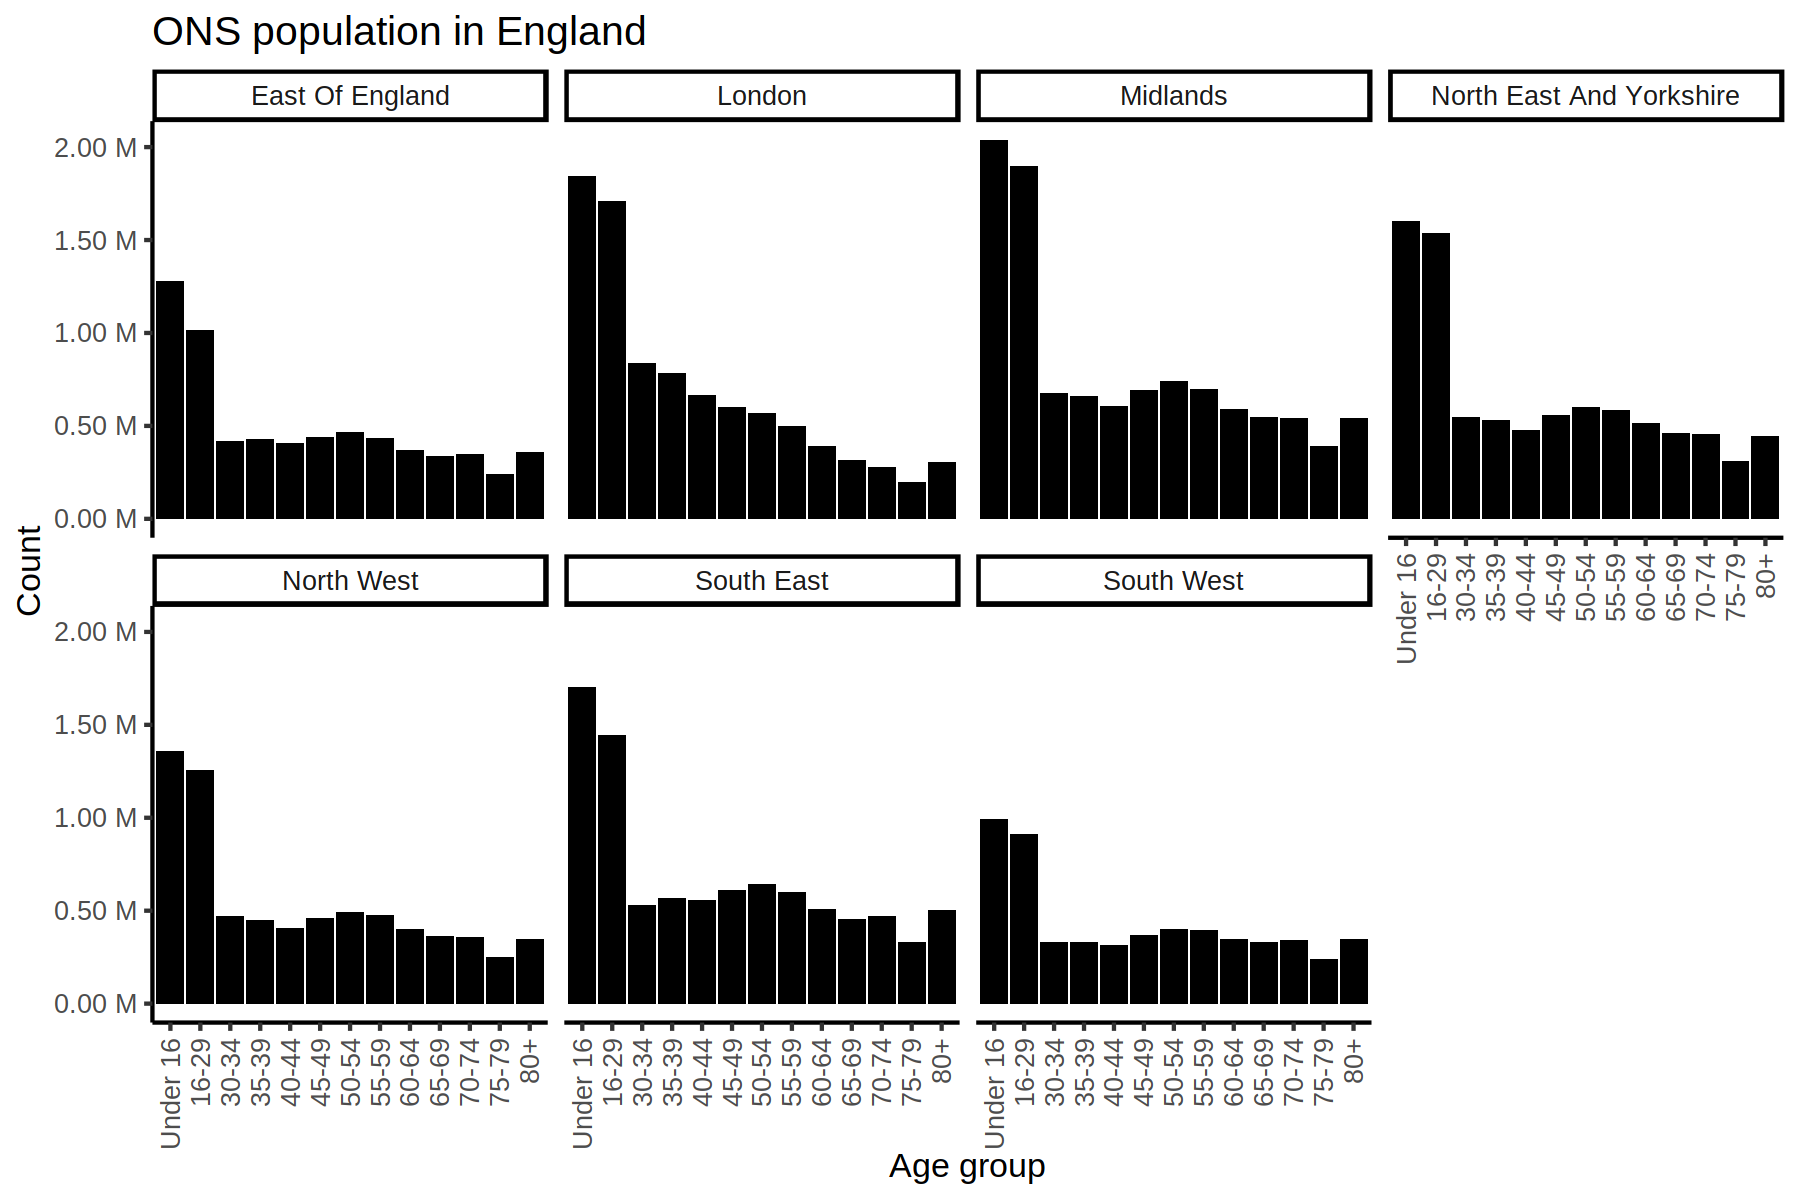

In [18]:
pivot_longer(population, !Region, names_to = "AgeGroup", values_to = "Count") %>% 
    mutate(AgeGroup = factor(AgeGroup, levels = unique(AgeGroup))) %>%
    ggplot(aes(AgeGroup, Count)) + geom_col(fill = "black") + 
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_x_discrete(labels = levels(agegroups1)) + # Change X-axis labels
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "ONS population in England", x = "Age group")

### Cumulative COVID-19 doses by age group

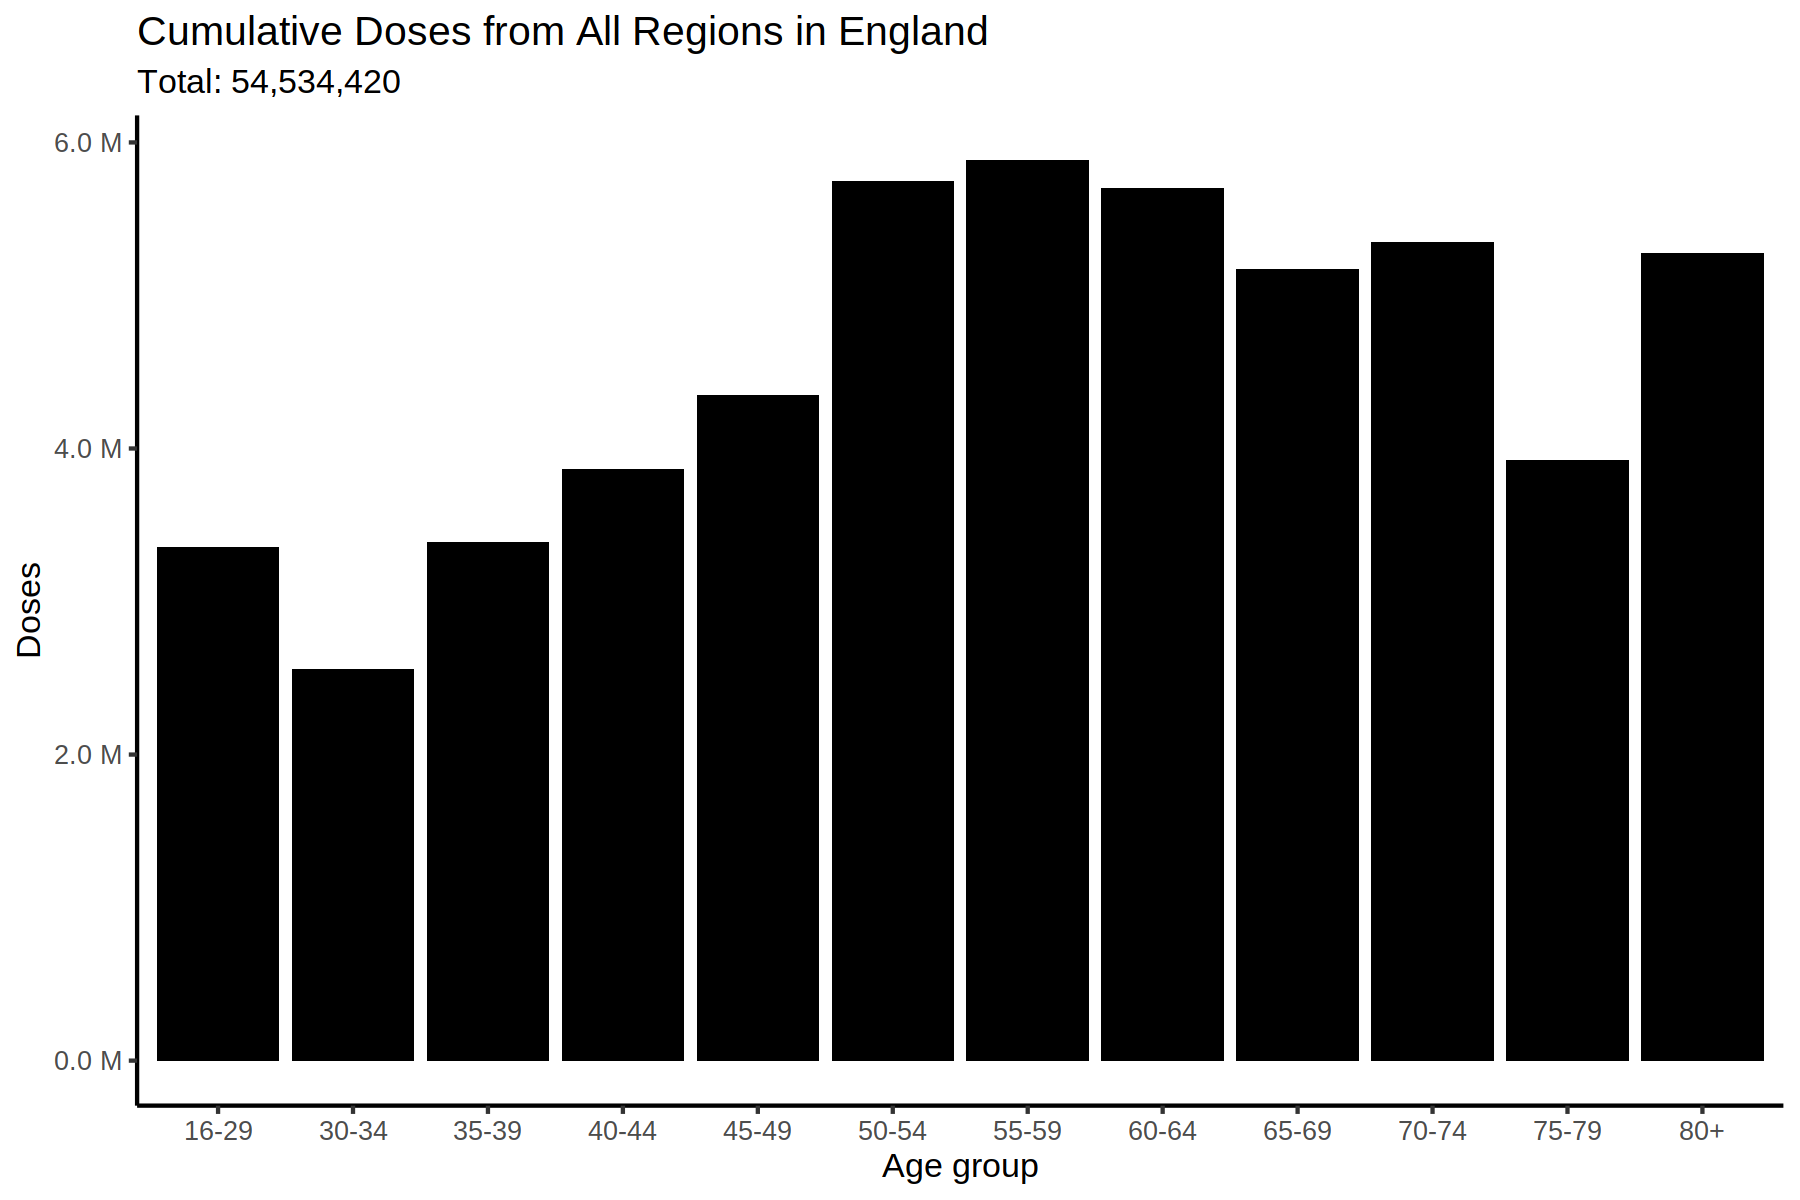

In [19]:
total <- data %>% summarise(sum(Count)) %>% pull()
total <- label_comma(accuracy = 1)(total)

data %>% group_by(AgeGroup) %>% summarise(Doses = sum(Count)) %>%
    ggplot(aes(AgeGroup, Doses)) + geom_col(fill = "black") + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) + 
    labs(title = "Cumulative Doses from All Regions in England", subtitle = paste("Total:", total), 
         x = "Age group")

### Total COVID-19 doses by NHS region of residence and age group

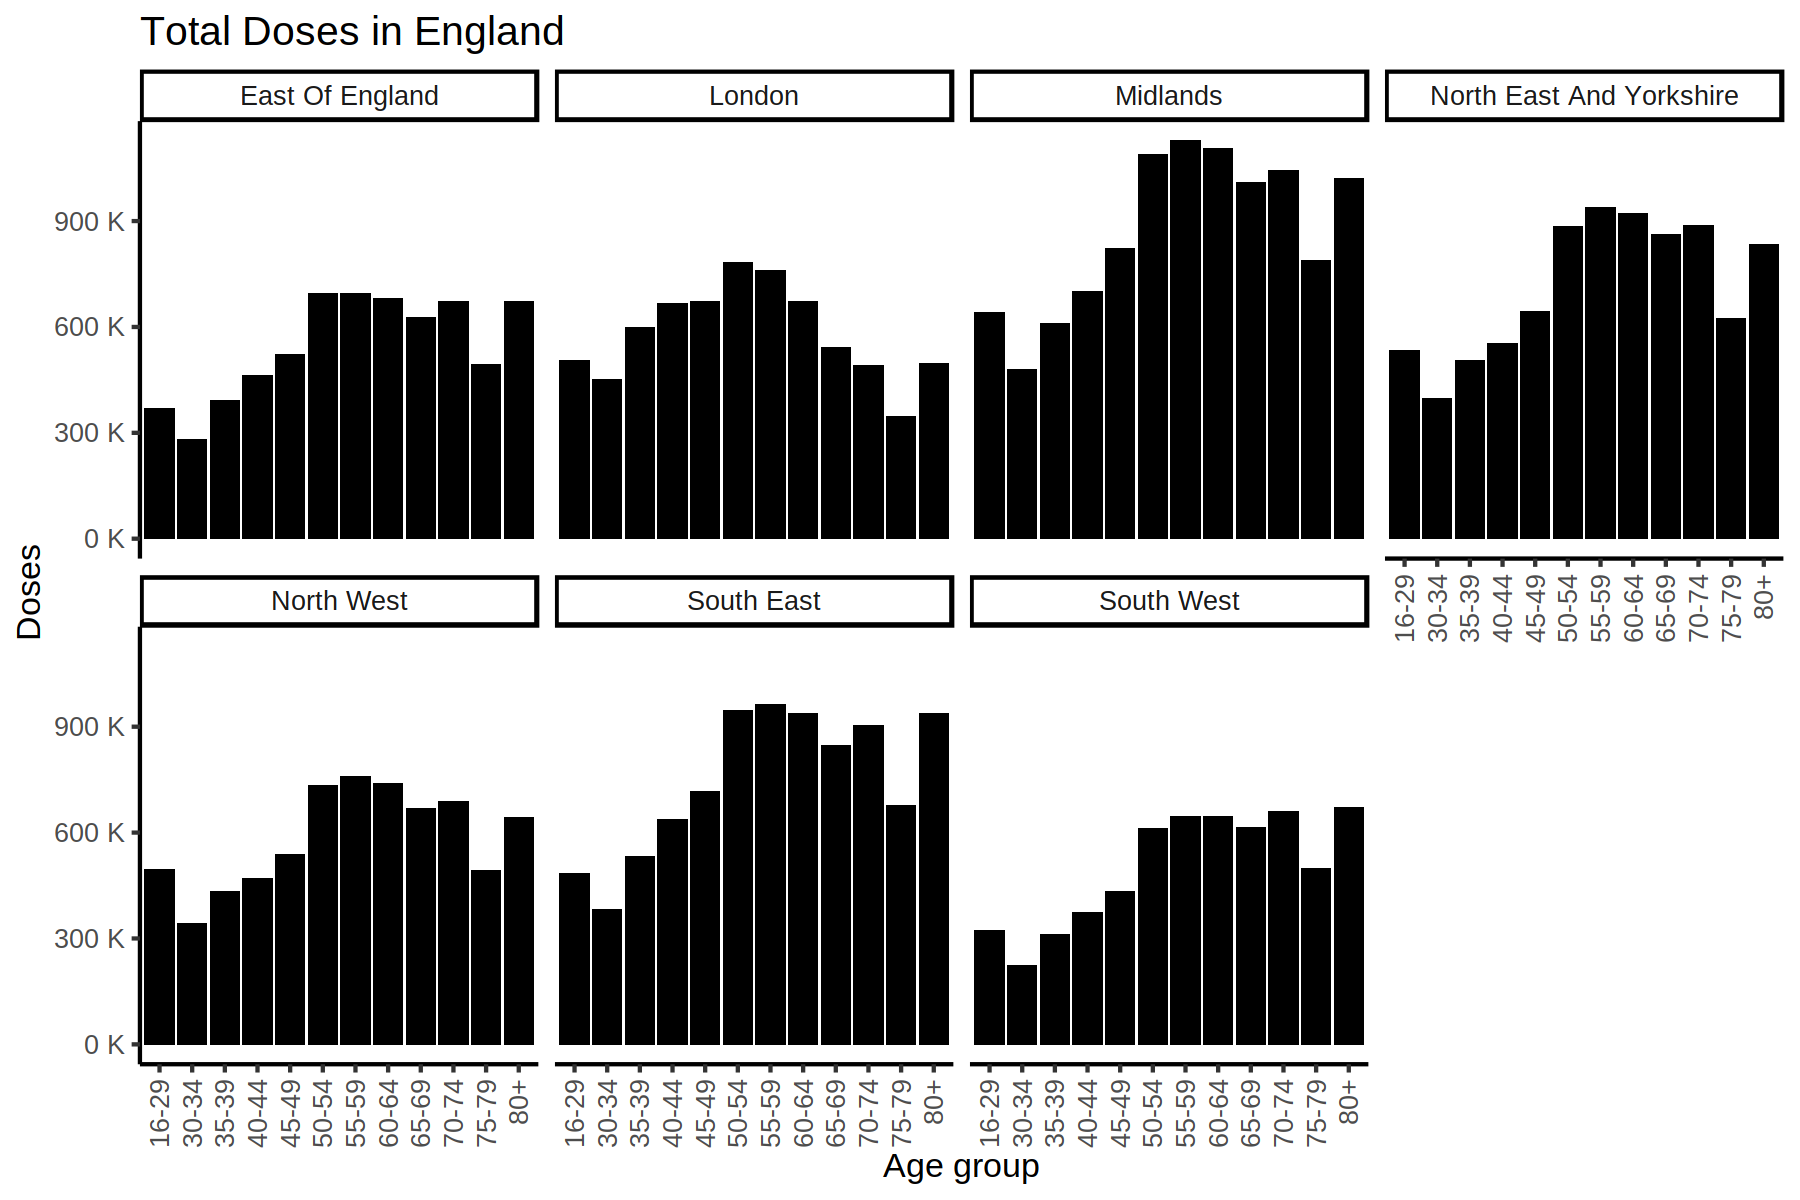

In [20]:
ggplot(data, aes(AgeGroup, Count)) + geom_col(fill = "black", width = 0.9) + 
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total Doses in England", x = "Age group", y = "Doses")

### Total COVID-19 doses by NHS region of residence and age group, coloured by 1st and 2nd dose

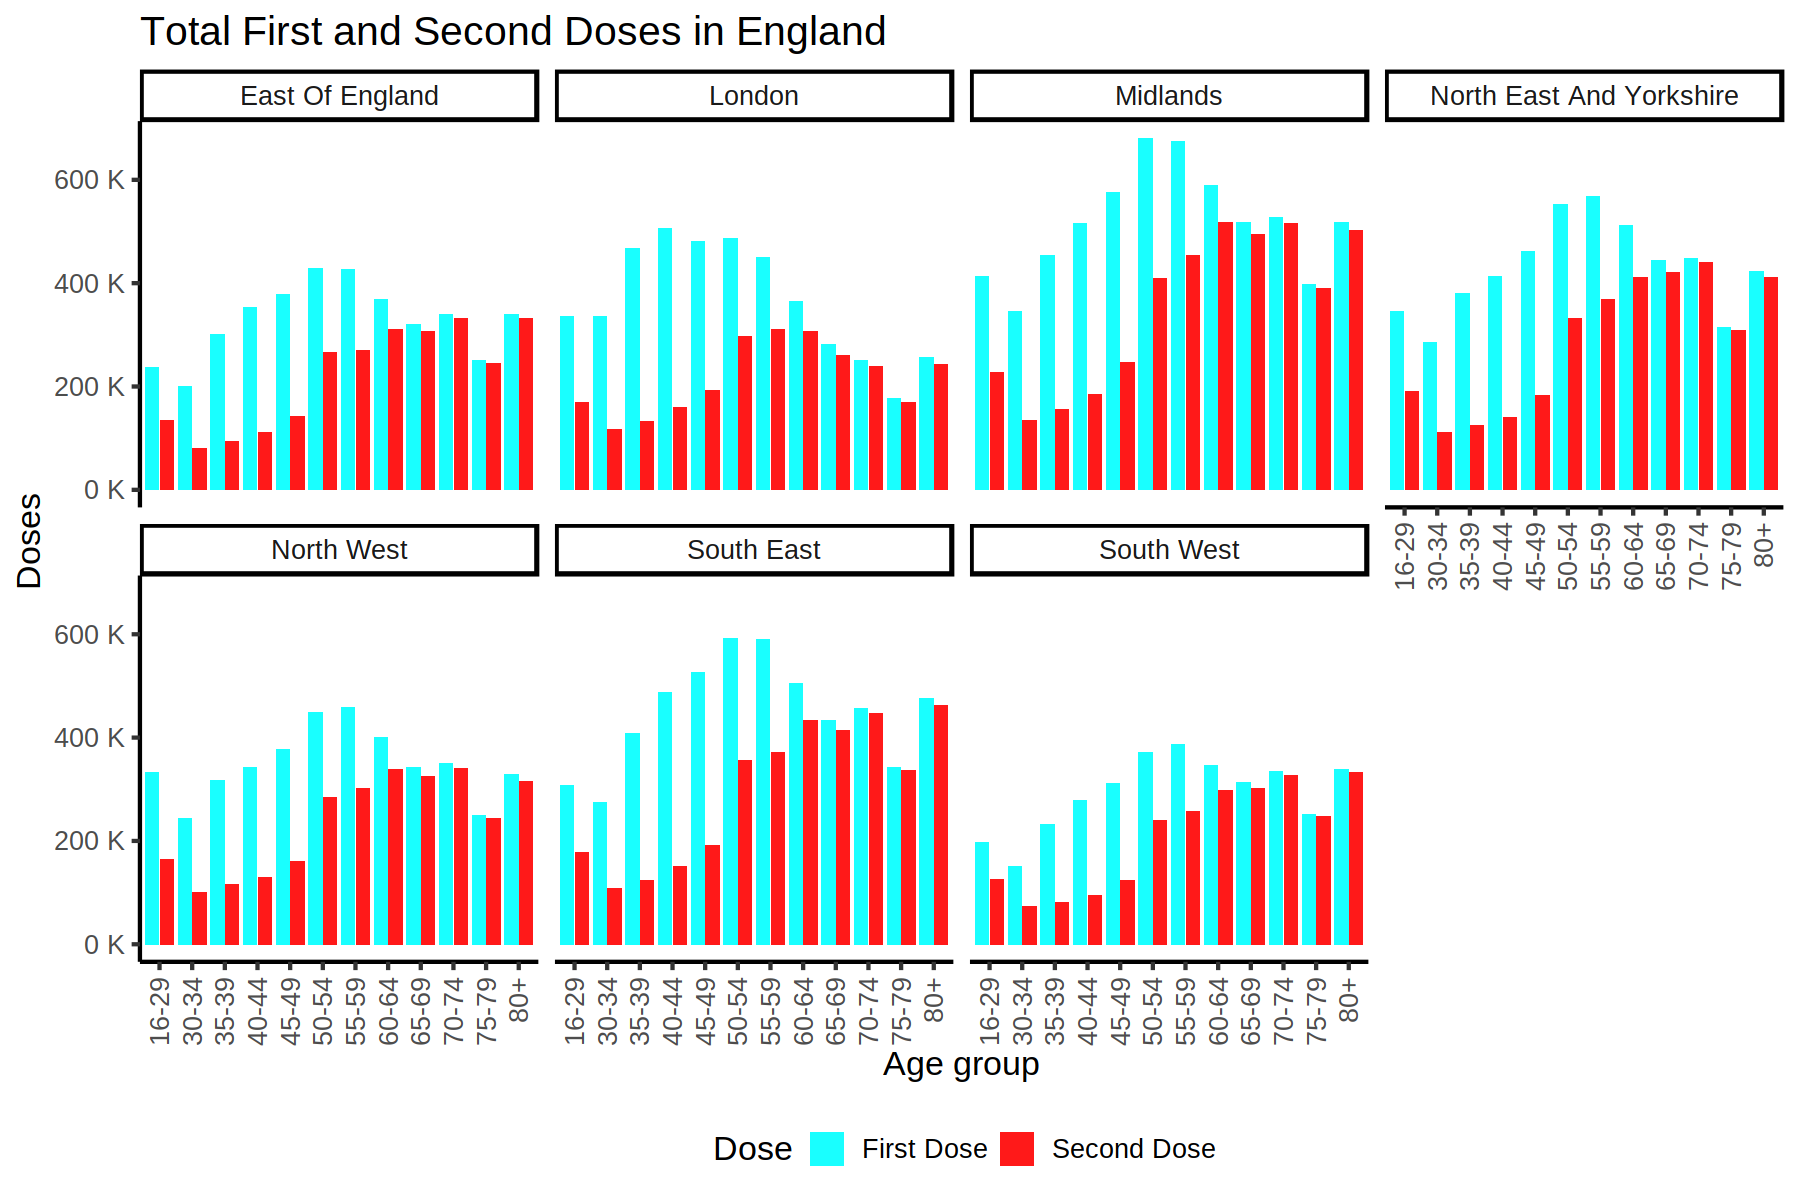

In [21]:
ggplot(data, aes(AgeGroup, Count, fill = Dose)) + 
    geom_col(alpha = 0.9, position = position_dodge2(width = 0.9, padding = 0.1)) +
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = unit_format(unit = "K", scale = 1e-3)) + 
    scale_fill_manual(values = c("cyan","red")) +
    theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First and Second Doses in England", x = "Age group", y = "Doses")

### Percentage of estimated population receiving COVID-19 vaccination, coloured by 1st and 2nd dose

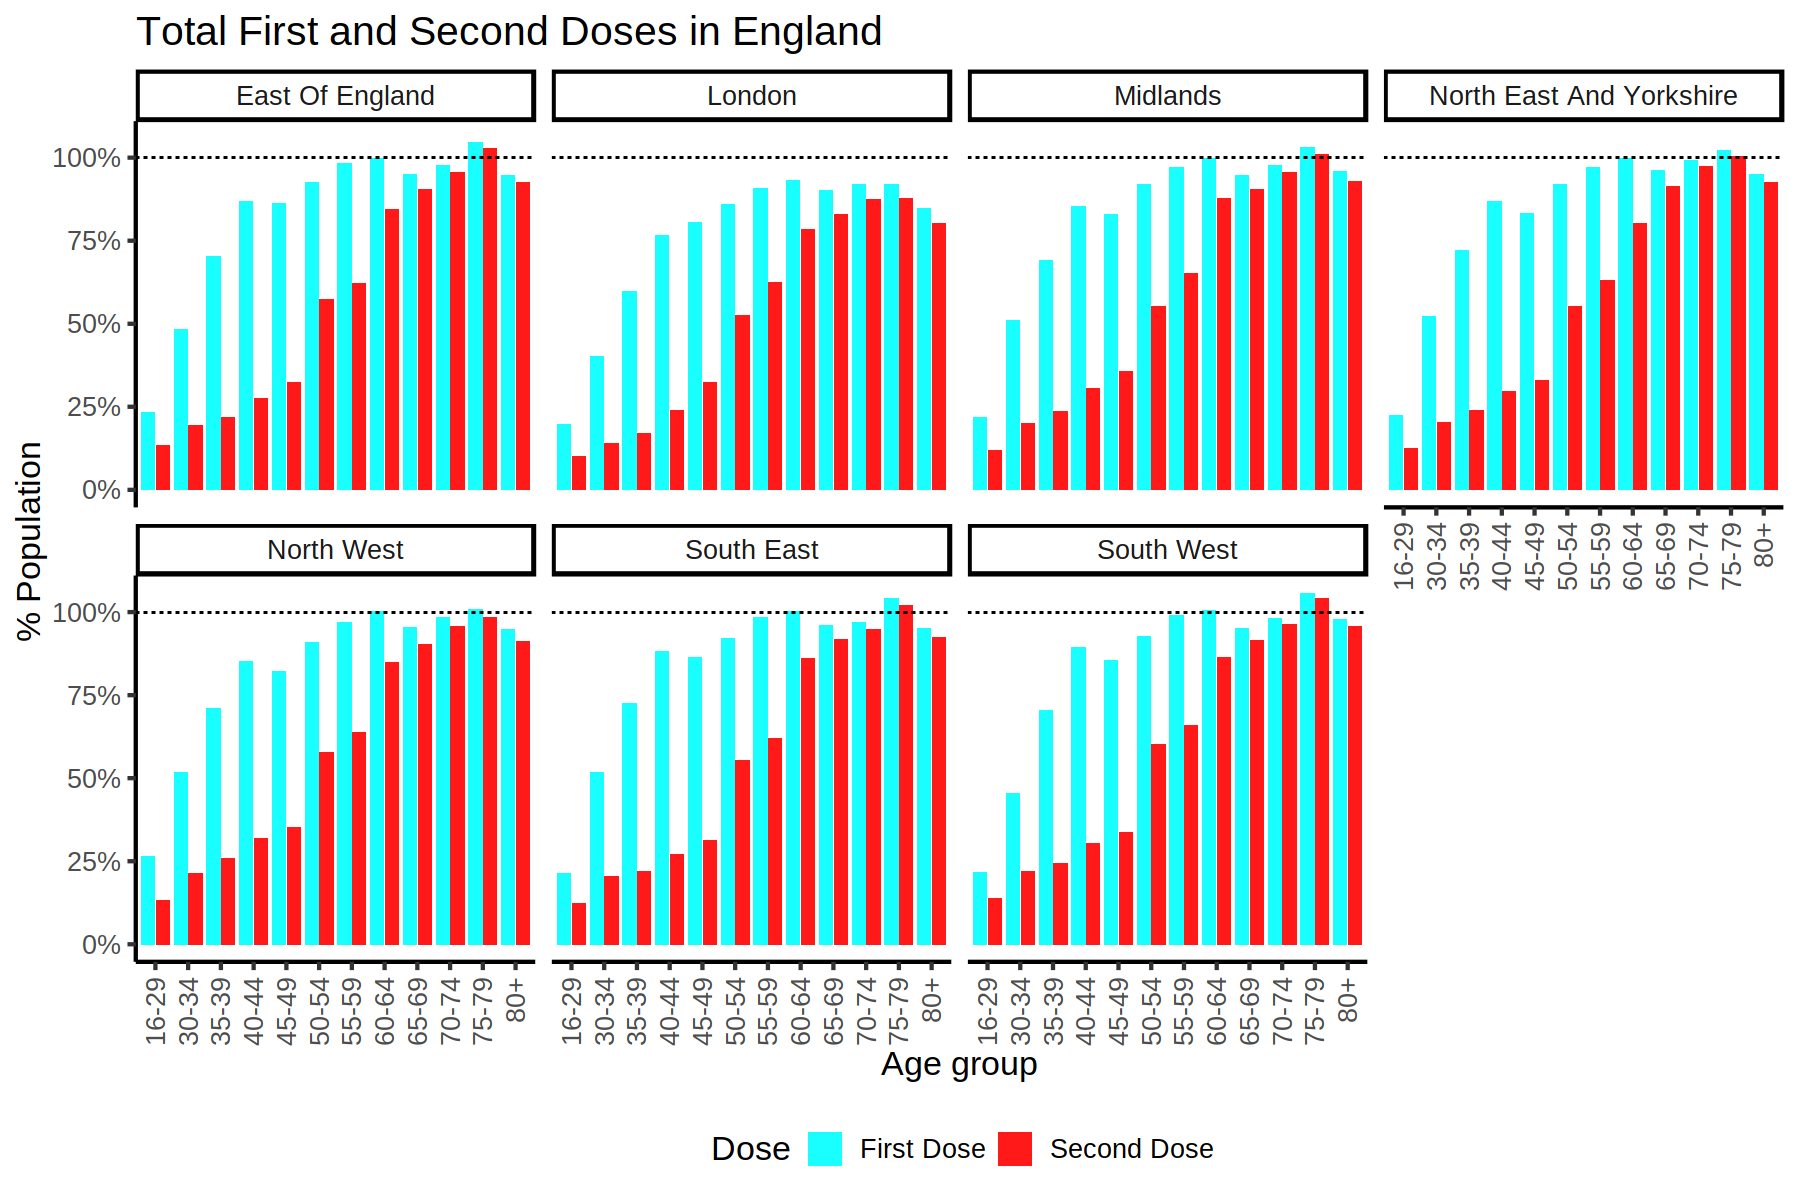

In [22]:
ggplot(data, aes(AgeGroup, Fraction, fill = Dose)) + 
    geom_col(alpha = 0.9, position = position_dodge2(width = 0.9, padding = 0.1)) + 
    facet_wrap(~ Region, ncol = 4) + theme_classic(base_size = 16) +
    scale_y_continuous(labels = percent_format(accuracy = 1)) +
    scale_fill_manual(values = c("cyan","red")) + geom_hline(yintercept = 1, linetype = 2) +
    theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First and Second Doses in England", x = "Age group", y = "% Population")

### COVID-19 cumulative vaccinations by date of vaccination

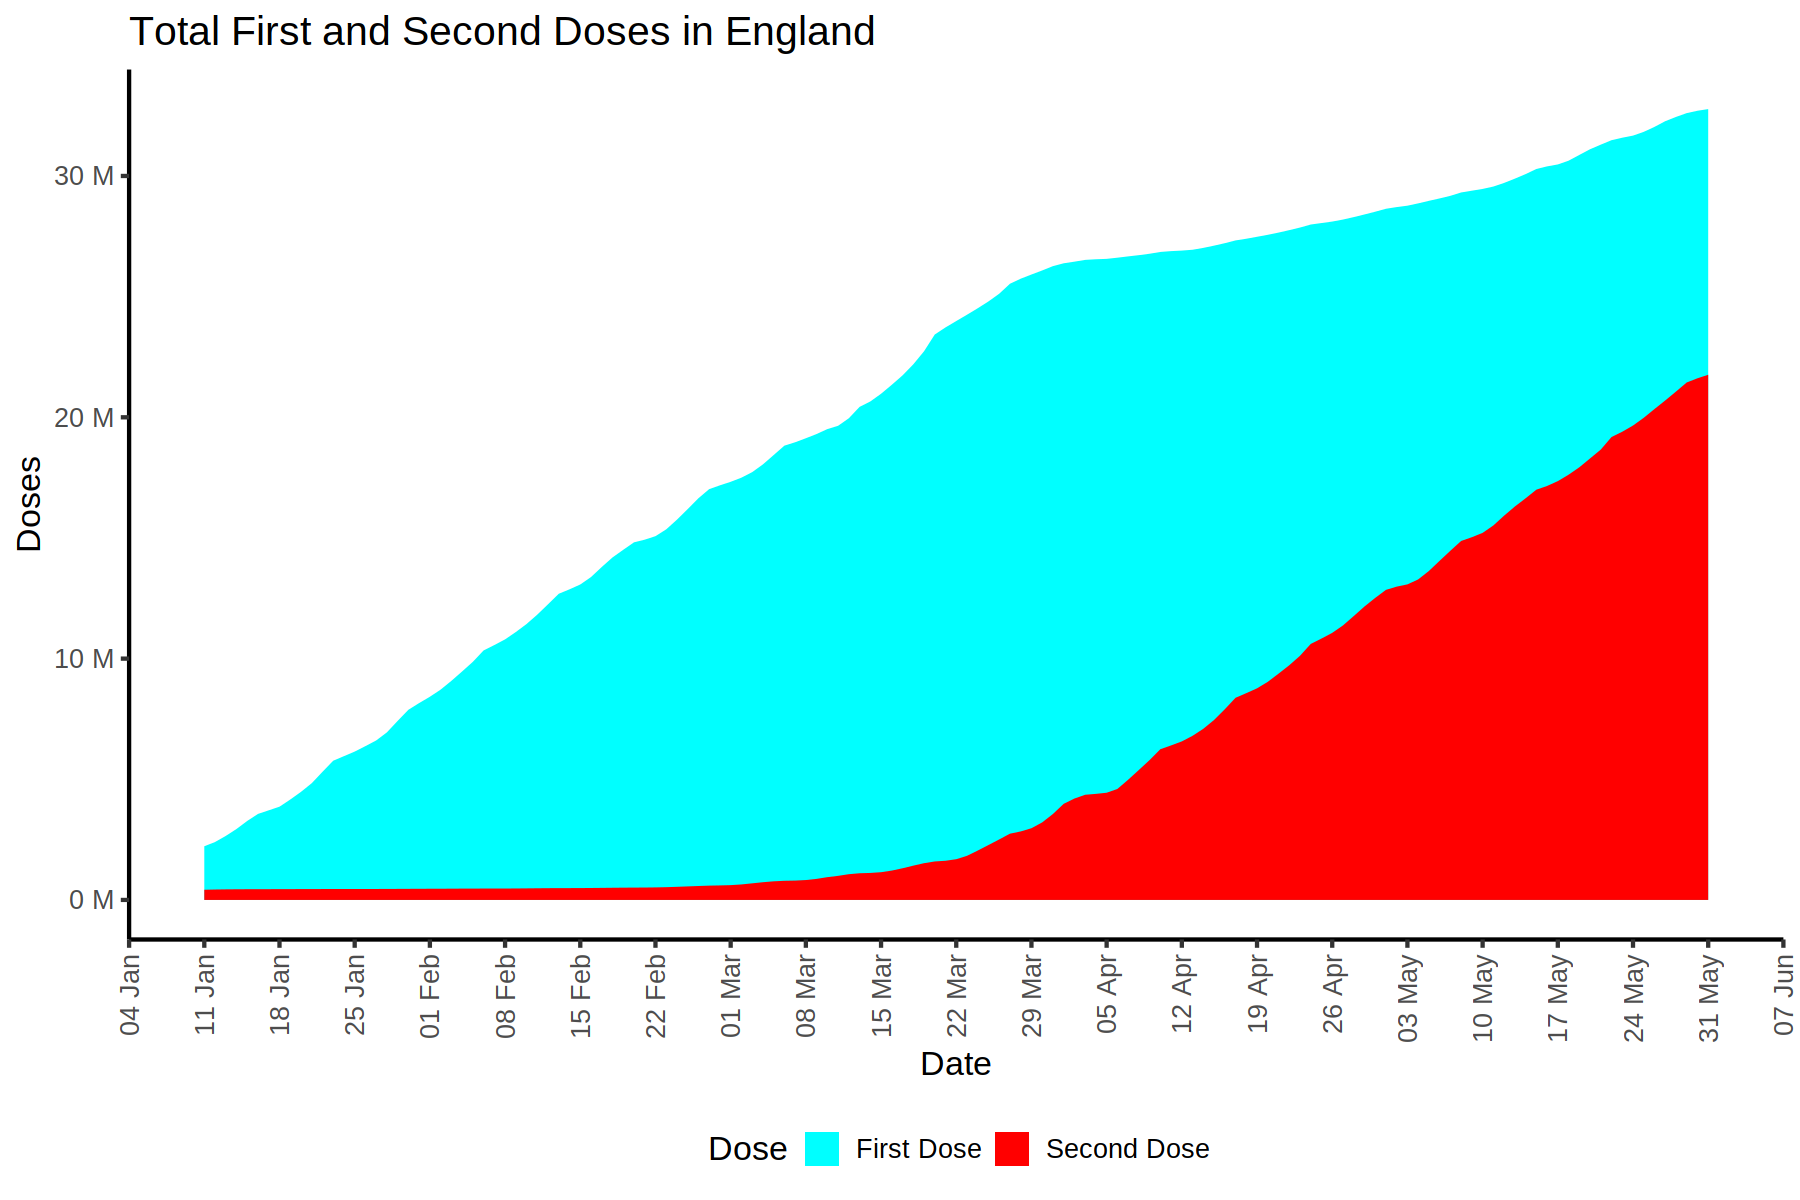

In [23]:
data2 %>% group_by(Date, Dose) %>% summarise(Count = sum(Count), .groups = "drop") %>%
    ggplot(aes(Date, Count, fill = Dose)) + geom_area(position = position_dodge(width = 0)) + 
    theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b", date_breaks = "1 week") +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
    scale_fill_manual(values = c("cyan","red")) +
    theme(legend.position = "bottom", axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
    labs(title = "Total First and Second Doses in England", x = "Date", y = "Doses")

### COVID-19 cumulative vaccinations by date of vaccination and NHS region of residence

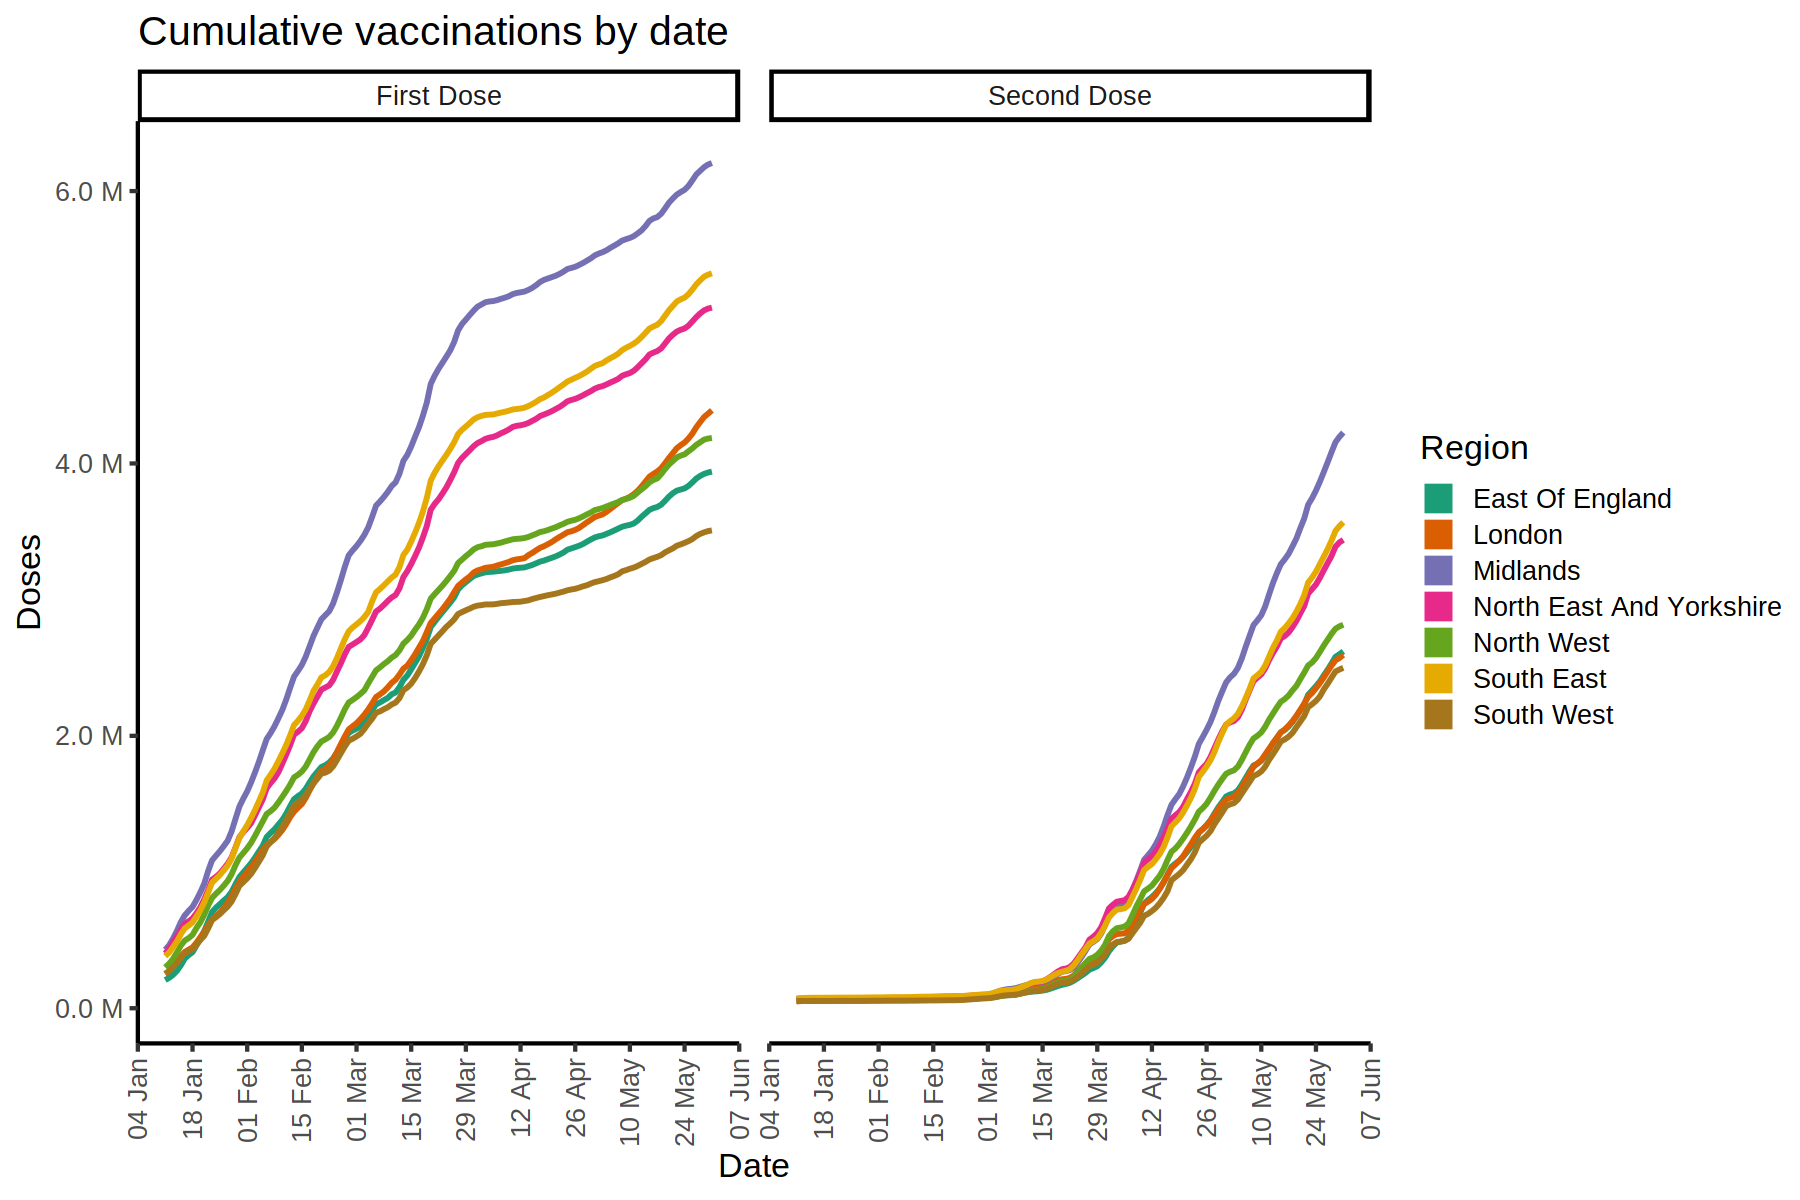

In [24]:
ggplot(data2, aes(Date, Count, color = Region)) + geom_line(size = 1) + 
    facet_wrap(~ Dose, ncol = 2) + theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b", date_breaks = "2 week") +
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
    scale_color_brewer(palette = "Dark2") + guides(color = guide_legend(override.aes = list(size = 5))) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), panel.spacing = unit(1, "lines")) +
    labs(title = "Cumulative vaccinations by date", x = "Date", y = "Doses")

### Percentage of estimated population receiving COVID-19 vaccination, coloured by region

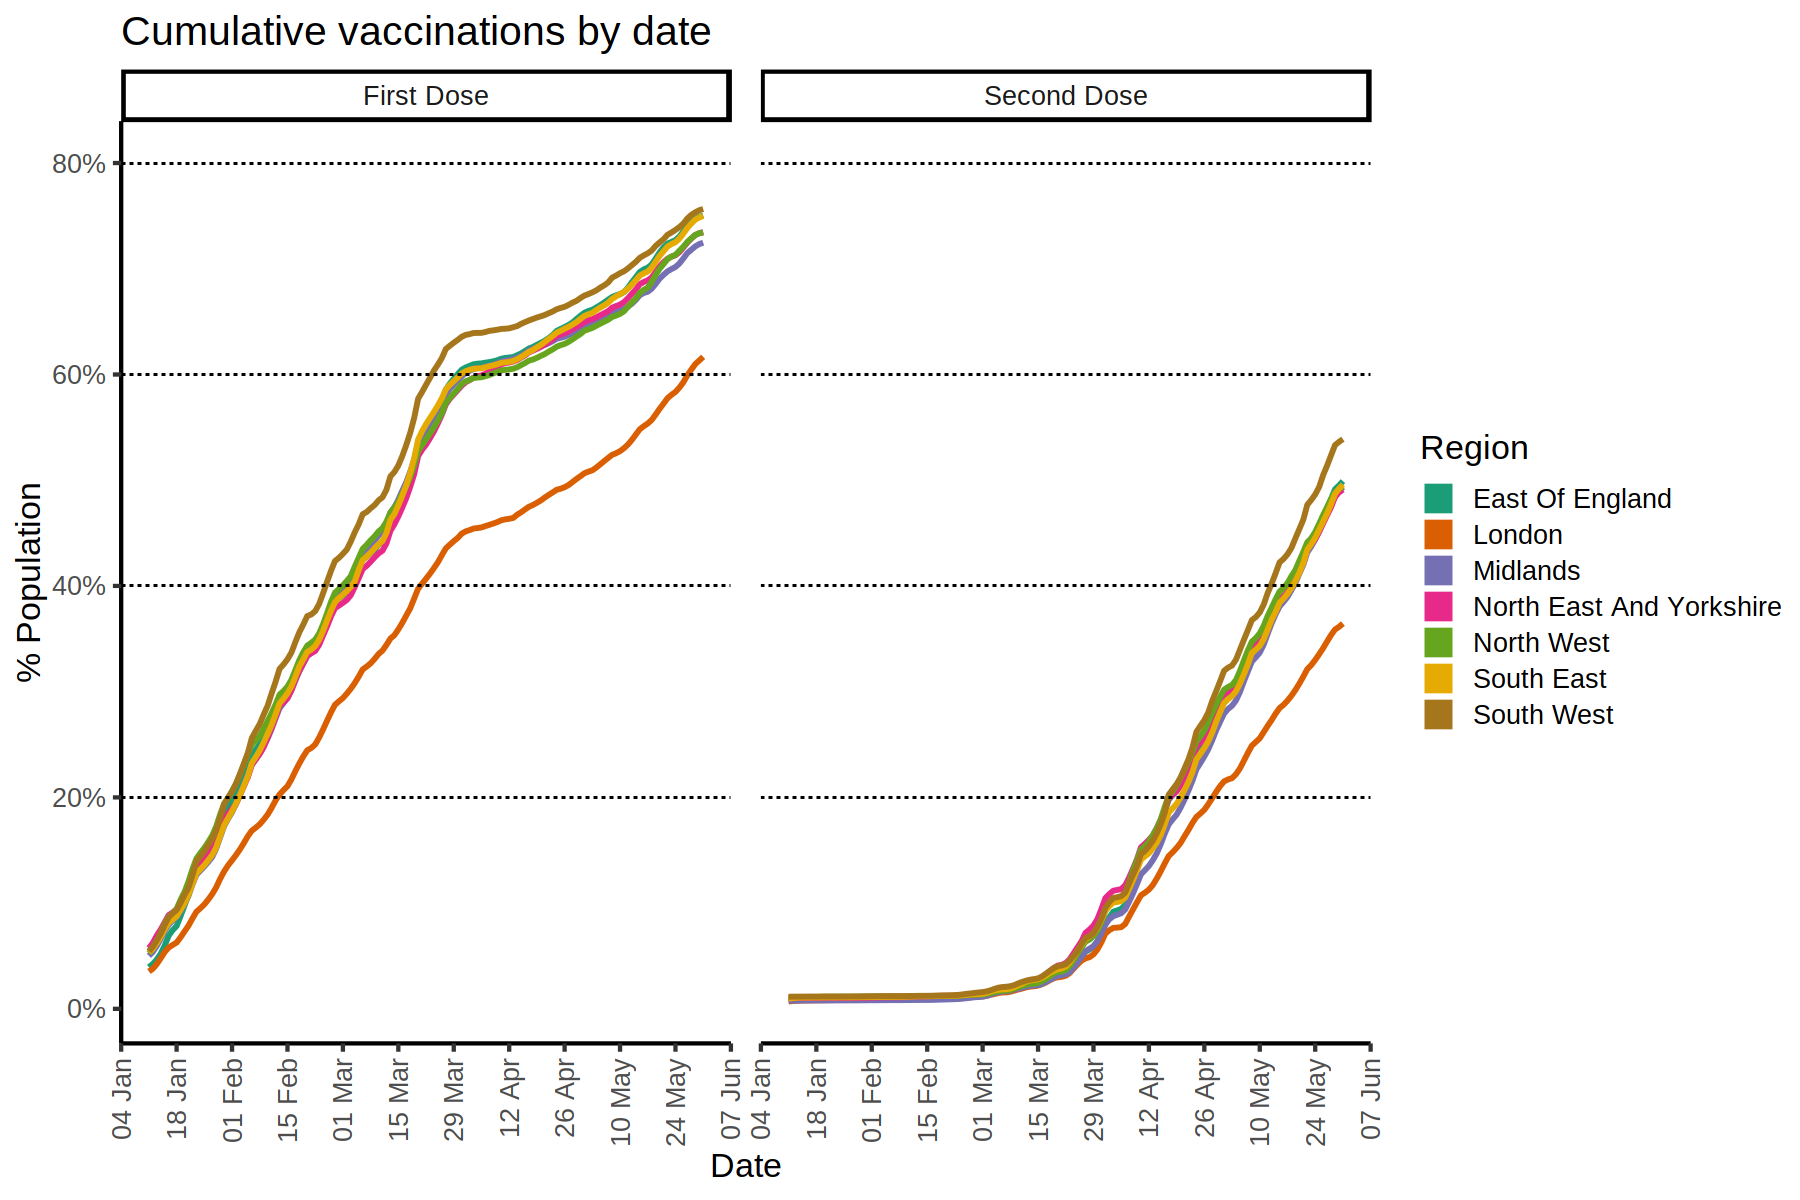

In [25]:
ggplot(data2, aes(Date, Fraction, color = Region)) + geom_line(size = 1) + 
    facet_wrap(~ Dose, ncol = 2) + theme_classic(base_size = 16) +
    scale_x_date(date_labels = "%d %b", date_breaks = "2 week") +
    scale_y_continuous(labels = percent_format(accuracy = 1)) +
    scale_color_brewer(palette = "Dark2") + guides(color = guide_legend(override.aes = list(size = 5))) +
    geom_hline(yintercept = seq(0.2, 0.8, 0.2), linetype = 2) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), panel.spacing = unit(1, "lines")) +
    labs(title = "Cumulative vaccinations by date", x = "Date", y = "% Population")

## 8. Session info

In [26]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/ihsuan/miniconda3_4.10.0/envs/jupyterlab/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C               LC_TIME=en_GB.UTF-8       
 [4] LC_COLLATE=en_GB.UTF-8     LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                  LC_ADDRESS=C              
[10] LC_TELEPHONE=C             LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1   stringr_1.4.0   dplyr_1.0.6     purrr_0.3.4     readr_1.4.0     tidyr_1.1.3    
 [7] tibble_3.1.2    tidyverse_1.3.1 scales_1.1.1    ggplot2_3.3.3   readxl_1.3.1   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.6         lubridate_1.7.10   ps_1.6.0           gtools_3.8.